In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

## <span style="color:#004f9f"> 0. Importing Data </span>

In [ ]:
df = pd.read_pickle('data/acc_raw.pkl')
tr = df[~df['음주운전'].isnull()]
te = df[df['음주운전'].isnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74485 entries, A000002 to A020850
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사고월        74485 non-null  int64  
 1   사고일        74485 non-null  int64  
 2   사고시각       74485 non-null  int64  
 3   사고요일       74485 non-null  int64  
 4   사고지역       74485 non-null  object 
 5   사망자수       74485 non-null  int64  
 6   중상자수       74485 non-null  int64  
 7   경상자수       74485 non-null  int64  
 8   부상신고자수     74485 non-null  int64  
 9   사고유형_대범주   74485 non-null  object 
 10  사고유형_소범주   74485 non-null  object 
 11  법규위반       74485 non-null  object 
 12  노면상태       74485 non-null  object 
 13  기상상태       73575 non-null  object 
 14  도로형태_대범주   74485 non-null  object 
 15  도로형태_소범주   74485 non-null  object 
 16  가해운전자차종    72734 non-null  object 
 17  가해운전자성별    72738 non-null  object 
 18  가해운전자연령    72727 non-null  float64
 19  가해운전자상해정도  70172 non-null  object 
 20  피해운

## <span style="color:#004f9f"> 1. Basic Data Analysis </span>

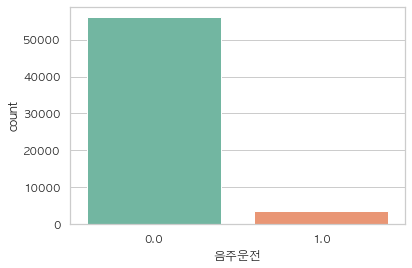

In [ ]:
sns.countplot(x='음주운전', data=tr);

In [ ]:
tr.음주운전.value_counts(normalize=True)

0.0    0.940694
1.0    0.059306
Name: 음주운전, dtype: float64

### <span style="color:#004f9f"> 1.1. 단일변수 시각화 </span>

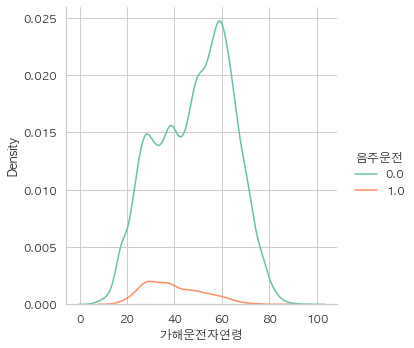

In [ ]:
sns.displot(x='가해운전자연령', hue='음주운전', data=tr, kind='kde');

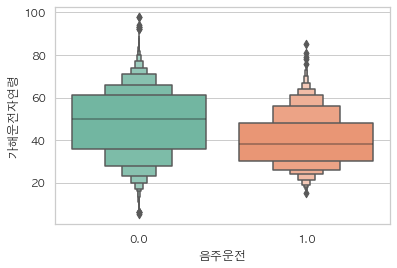

In [ ]:
sns.boxenplot(x='음주운전', y='가해운전자연령', data=tr);

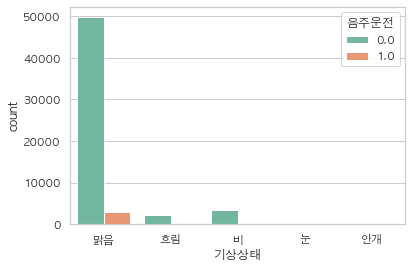

In [ ]:
sns.countplot(x='기상상태', hue='음주운전', data=tr);

### <span style="color:#004f9f"> 1.2. 다변수 시각화 </span>

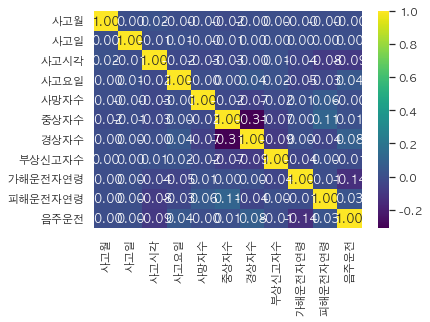

In [ ]:
# 다중 공선성 제거하기용으로 0.9이상이면 제거
sns.heatmap(df.select_dtypes(['number']).corr(), annot=True, fmt='0.2f', cmap='viridis');

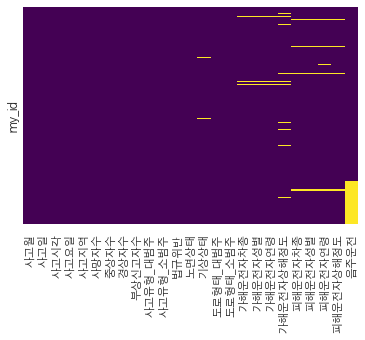

In [ ]:
#노란색이 결측치
#결측치는 지우는게 좋음 (dropna)
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, 
            linecolor='white',cmap='viridis');

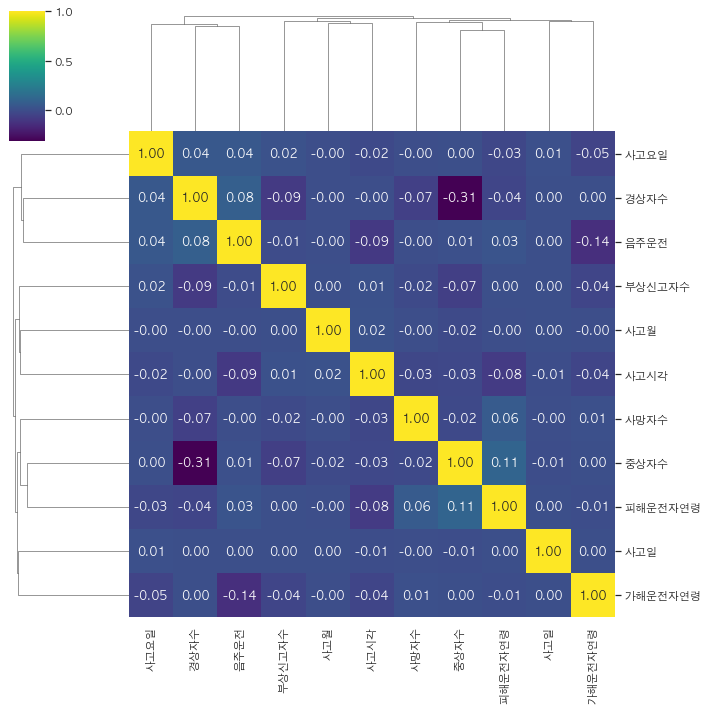

In [ ]:
# 덴드로그램으로 비슷한거 묶거나 제거 (최종적으로 처리)
# 목표변수는 제거 하고 
sns.clustermap(df.select_dtypes(['number']).corr(), annot=True, fmt='0.2f', cmap='viridis');